<h1 align=center> <font size = 5>Effect of Neighborhoods on Housing Pricing in City of Los Angeles

### Note: GitHub doesn't render maps. If you don't see maps in Notebook, please copy and paste resiporatory address to [nbviewer](https://nbviewer.jupyter.org/) webpage and review there.

## 1-LA Neighborhoods

In this section, I'll create dataset for LA neighborhoods.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import requests

First let's download and read CSV file from internet

In [2]:
#obtaining CSV file from  internet
!wget -q -O 'la_neighborhoods.csv' https://usc.data.socrata.com/api/views/9utn-waje/rows.csv
print('Data downloaded!')

Data downloaded!


In [3]:
#creating dataset from CSV file
la_neighborhood=pd.read_csv('la_neighborhoods.csv')
print(la_neighborhood.shape)
la_neighborhood.head()

(272, 14)


,set,slug,the_geom,kind,external_i,name,display_na,sqmi,type,name_1,slug_1,latitude,longitude,location
0,L.A. County Neighborhoods (Current),acton,MULTIPOLYGON (((-118.20261747920541 34.5389897...,L.A. County Neighborhood (Current),acton,Acton,Acton L.A. County Neighborhood (Current),39.339109,unincorporated-area,NaN,NaN,-118.169810,34.497355,POINT(34.497355239240846 -118.16981019229348)
1,L.A. County Neighborhoods (Current),adams-normandie,MULTIPOLYGON (((-118.30900800000012 34.0374109...,L.A. County Neighborhood (Current),adams-normandie,Adams-Normandie,Adams-Normandie L.A. County Neighborhood (Curr...,0.805350,segment-of-a-city,NaN,NaN,-118.300208,34.031461,POINT(34.031461499124156 -118.30020800000011)
2,L.A. County Neighborhoods (Current),agoura-hills,MULTIPOLYGON (((-118.76192500000009 34.1682029...,L.A. County Neighborhood (Current),agoura-hills,Agoura Hills,Agoura Hills L.A. County Neighborhood (Current),8.146760,standalone-city,NaN,NaN,-118.759885,34.146736,POINT(34.146736499122795 -118.75988450000015)
3,L.A. County Neighborhoods (Current),agua-dulce,MULTIPOLYGON (((-118.2546773959221 34.55830403...,L.A. County Neighborhood (Current),agua-dulce,Agua Dulce,Agua Dulce L.A. County Neighborhood (Current),31.462632,unincorporated-area,NaN,NaN,-118.317104,34.504927,POINT(34.504926999796837 -118.3171036690717)
4,L.A. County Neighborhoods (Current),alhambra,MULTIPOLYGON (((-118.12174700000014 34.1050399...,L.A. County Neighborhood (Current),alhambra,Alhambra,Alhambra L.A. County Neighborhood (Current),7.623814,standalone-city,NaN,NaN,-118.136512,34.085539,POINT(34.085538999123571 -118.13651200000021)


Let's see how many different type of neighborhood exist in data set

In [4]:
#checking neighborhood types
la_neighborhood['type'].value_counts()

segment-of-a-city      114
standalone-city         87
unincorporated-area     71
Name: type, dtype: int64

As explained in report, only neighborhoods with type "segment-of-a-city" (meaning city of Los Angeles) will be kept

In [5]:
#selecting only neighborhoods with type: "segment-of-a-city"
la_neighborhood=la_neighborhood[(la_neighborhood["type"] == 'segment-of-a-city')]
la_neighborhood.head()

,set,slug,the_geom,kind,external_i,name,display_na,sqmi,type,name_1,slug_1,latitude,longitude,location
1,L.A. County Neighborhoods (Current),adams-normandie,MULTIPOLYGON (((-118.30900800000012 34.0374109...,L.A. County Neighborhood (Current),adams-normandie,Adams-Normandie,Adams-Normandie L.A. County Neighborhood (Curr...,0.805350,segment-of-a-city,NaN,NaN,-118.300208,34.031461,POINT(34.031461499124156 -118.30020800000011)
10,L.A. County Neighborhoods (Current),arleta,MULTIPOLYGON (((-118.42201500000009 34.2241029...,L.A. County Neighborhood (Current),arleta,Arleta,Arleta L.A. County Neighborhood (Current),3.096179,segment-of-a-city,NaN,NaN,-118.430757,34.243100,POINT(34.243099999121583 -118.4307575)
11,L.A. County Neighborhoods (Current),arlington-heights,"MULTIPOLYGON (((-118.315909 34.05261099912384,...",L.A. County Neighborhood (Current),arlington-heights,Arlington Heights,Arlington Heights L.A. County Neighborhood (Cu...,1.031415,segment-of-a-city,NaN,NaN,-118.323408,34.044910,POINT(34.04491049912405 -118.3234085)
13,L.A. County Neighborhoods (Current),atwater-village,MULTIPOLYGON (((-118.27832473089677 34.1530071...,L.A. County Neighborhood (Current),atwater-village,Atwater Village,Atwater Village L.A. County Neighborhood (Curr...,1.776894,segment-of-a-city,NaN,NaN,-118.262373,34.131066,POINT(34.131066356759177 -118.26237347966236)
17,L.A. County Neighborhoods (Current),vermont-slauson,"MULTIPOLYGON (((-118.280607 33.9933139991246, ...",L.A. County Neighborhood (Current),vermont-slauson,Vermont-Slauson,Vermont-Slauson L.A. County Neighborhood (Curr...,1.442453,segment-of-a-city,NaN,NaN,-118.290358,33.983914,POINT(33.983913999124709 -118.29035750000011)


and here is final touch ups to make data set ready

In [6]:
#deleting unneccessary columns
la_neighborhood.drop(['set', 'slug','the_geom', 'kind', 'external_i', 'display_na', 'sqmi', 'type','name_1', 'slug_1', 'location'], axis=1, inplace=True)

#re-naming column "name" as "neighborhood"
la_neighborhood.rename(columns={"name":"neighborhood"}, inplace=True)

#reseting index
la_neighborhood.reset_index(drop=True, inplace=True)

print(la_neighborhood.shape)
la_neighborhood.head()

(114, 3)


,neighborhood,latitude,longitude
0,Adams-Normandie,-118.300208,34.031461
1,Arleta,-118.430757,34.243100
2,Arlington Heights,-118.323408,34.044910
3,Atwater Village,-118.262373,34.131066
4,Vermont-Slauson,-118.290358,33.983914


Let's see these neighborhoods on LA map

In [7]:
#importing libraries
import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.1               |             py_0          26 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                       

In [8]:
# getting geographical data for city of LA
address = 'Los Angeles, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
Latitude = location.latitude
Longitude = location.longitude
print('The geograpical coordinate of Los Angeles are {}, {}.'.format(Latitude, Longitude))

The geograpical coordinate of Los Angeles are 34.0536909, -118.2427666.


In [9]:
map_la = folium.Map(location=[Latitude, Longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(la_neighborhood['longitude'], la_neighborhood['latitude'], la_neighborhood['neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_la)  
    
map_la

## 2- LA housing prices

Our Source for LA sold housing prices is Redfin website. I filtered results with below criteria and saved on a local drive. Later I uploaded the information
* houses sold during last year
* only condos and town homes
* properties under 2,000 square-feet

In [10]:
# The code was removed by Watson Studio for sharing.

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,PAST SALE,February-11-2020,Condo/Co-op,4558 Willis Ave #109,Sherman Oaks,CA,91403,485000,2,2.0,...,Sold,NaN,NaN,http://www.redfin.com/CA/Sherman-Oaks/4558-Wil...,CRMLS,BB19263253,N,Y,34.153650,-118.454706
1,PAST SALE,February-27-2020,Condo/Co-op,1615 Echo Park Ave #4,Echo Park,CA,90026,980000,3,4.0,...,Sold,NaN,NaN,http://www.redfin.com/CA/Los-Angeles/1615-Echo...,CRMLS,BB20005930,N,Y,34.082351,-118.254832
2,PAST SALE,September-9-2019,Condo/Co-op,11947 Dorothy St #202,Los Angeles,CA,90049,810000,2,2.0,...,Sold,NaN,NaN,http://www.redfin.com/CA/Los-Angeles/11947-Dor...,TheMLS,19-495018,N,Y,34.049958,-118.469722
3,PAST SALE,NaN,Condo/Co-op,14501 Tupper St #36,Panorama City,CA,91402,300000,3,2.0,...,NaN,NaN,NaN,http://www.redfin.com/CA/Panorama-City/14501-T...,NaN,NaN,N,Y,34.239891,-118.448450
4,PAST SALE,May-22-2020,Condo/Co-op,15231 Magnolia Blvd #117,Sherman Oaks,CA,91403,433000,2,2.0,...,Sold,NaN,NaN,http://www.redfin.com/CA/Sherman-Oaks/15231-W-...,CRMLS,BB20069657,N,Y,34.165849,-118.465634


Let's select information we need

In [11]:
# selecting required columns
la_houses=la_houses[['CITY','$/SQUARE FEET','LATITUDE','LONGITUDE']]
la_houses.rename(columns={'CITY':'neighborhood'},inplace=True)
print (la_houses.shape)
la_houses.head()

(6300, 4)


,neighborhood,$/SQUARE FEET,LATITUDE,LONGITUDE
0,Sherman Oaks,463,34.153650,-118.454706
1,Echo Park,627,34.082351,-118.254832
2,Los Angeles,600,34.049958,-118.469722
3,Panorama City,333,34.239891,-118.448450
4,Sherman Oaks,384,34.165849,-118.465634


neighborhods in *_"la_houses"_* dataset is based on city names and is different from *_"la_neighborhood"_* (there are some common neighborhoods). 
First we have to update neighborhoods in *_"la_houses"_* to match with *_"la_houses"_*. Distance of each sold property will be calculated from each neighborhood (using geopy distance function) and closest neighborhood will be assigned to row

In [12]:
import geopy.distance
for i in range(len(la_houses["neighborhood"])):
        dist=[]
        if la_neighborhood['neighborhood'].eq(la_houses.iloc[i,0]).sum() == 0:
            for j in range(len(la_neighborhood["neighborhood"])):
                coords_1 =(la_houses.iloc[i,2],la_houses.iloc[i,3])
                coords_2 =(la_neighborhood.iloc[j,2],la_neighborhood.iloc[j,1])
                dist.append(geopy.distance.distance(coords_1,coords_2))
            pos=dist.index(min(dist))  
            la_houses.iloc[i,0]=la_neighborhood.iloc[pos,0]


In [13]:
print (len(la_houses["neighborhood"].unique()))
la_houses.head()

63


,neighborhood,$/SQUARE FEET,LATITUDE,LONGITUDE
0,Sherman Oaks,463,34.153650,-118.454706
1,Echo Park,627,34.082351,-118.254832
2,Sawtelle,600,34.049958,-118.469722
3,Panorama City,333,34.239891,-118.448450
4,Sherman Oaks,384,34.165849,-118.465634


In [14]:
la_houses["neighborhood"].unique()

array(['Sherman Oaks', 'Echo Park', 'Sawtelle', 'Panorama City',
       'Glassell Park', 'Rancho Park', 'Brentwood', 'Downtown',
       'Canoga Park', 'Tarzana', 'Koreatown', 'Toluca Lake', 'Palms',
       'Harbor City', 'Westlake', 'Granada Hills', 'Valley Village',
       'Playa Vista', 'West Los Angeles', 'Hollywood', 'Encino',
       'Westchester', 'Hollywood Hills', 'Playa del Rey', 'San Pedro',
       'Harvard Heights', 'North Hollywood', 'Van Nuys', 'Del Rey',
       'Chatsworth', 'Woodland Hills', 'Porter Ranch', 'Mar Vista',
       'Montecito Heights', 'Westwood', 'Pacoima', 'East Hollywood',
       'Northridge', 'Winnetka', 'El Sereno', 'Studio City', 'Los Feliz',
       'Mission Hills', 'Reseda', 'Century City', 'Sylmar',
       'Griffith Park', 'North Hills', 'Larchmont', 'Beverly Grove',
       'Sunland', 'Tujunga', 'Chinatown', 'Eagle Rock', 'Venice',
       'Baldwin Hills/Crenshaw', 'Lake Balboa', 'West Adams',
       'Hollywood Hills West', 'Leimert Park', 'Elysian Park

As it's clear only housing data for 63 neighborhood is available. So only these neighborhoods, will be used.

## 3- Neighborhood Clustering

Now it's time to start clustering neighborhoods. For this purpose, Foursquare API will be used to extract venues information for each neighborhood.

First step, creating Foursquare API

In [15]:
# creating FourSquare API connection
CLIENT_ID = 'H3S1RXV5CSQESSZGHAYJBC52WAW1DCMXL0AIAXZDPDRTMWN5' # your Foursquare ID
CLIENT_SECRET = 'ZWH503IOQO54IXKIGXG0TZBJYW0AQPOXPUJ42PDOYMBMCQCK' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: H3S1RXV5CSQESSZGHAYJBC52WAW1DCMXL0AIAXZDPDRTMWN5
CLIENT_SECRET:ZWH503IOQO54IXKIGXG0TZBJYW0AQPOXPUJ42PDOYMBMCQCK


We need a function to extract all venues nearby each neighborhood

In [16]:
#### definning function to extract venues information for all the neighborhoods
def getNearbyVenues(names, latitudes, longitudes, radius, LIMIT):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)      
    

Now let's run above function for LA neighborhood data set

In [19]:
# getting neighborhood venue information
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius
la_venues = getNearbyVenues(names=la_neighborhood['neighborhood'],
                                   latitudes=la_neighborhood['longitude'],
                                   longitudes=la_neighborhood['latitude'], radius=radius, LIMIT=LIMIT)

In [20]:
print (la_venues.shape)
la_venues.head()

(9071, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adams-Normandie,34.031461,-118.300208,Revolutionario,34.025417,-118.298582,Taco Place
1,Adams-Normandie,34.031461,-118.300208,Skinny B*tch Pizza,34.039816,-118.298767,Pizza Place
2,Adams-Normandie,34.031461,-118.300208,Tacos El Unico,34.033000,-118.291232,Taco Place
3,Adams-Normandie,34.031461,-118.300208,La Barca Restaurant,34.033953,-118.291479,Mexican Restaurant
4,Adams-Normandie,34.031461,-118.300208,Orange Door Sushi,34.032485,-118.299368,Sushi Restaurant


In [21]:
la_venues.groupby(['Neighborhood']).count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adams-Normandie,90,90,90,90,90,90
Arleta,72,72,72,72,72,72
Arlington Heights,100,100,100,100,100,100
Atwater Village,100,100,100,100,100,100
Baldwin Hills/Crenshaw,87,87,87,87,87,87
Bel-Air,9,9,9,9,9,9
Beverly Crest,9,9,9,9,9,9
Beverly Grove,100,100,100,100,100,100
Beverlywood,100,100,100,100,100,100


We need to know the frequncy of each venue type within neighborhoods

In [22]:
la_onehot = pd.get_dummies(la_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
la_onehot['Neighborhood'] = la_venues['Neighborhood'] 

print (la_onehot.shape)
la_onehot.head()


(9071, 405)


,ATM,Accessories Store,Adult Boutique,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# calculating frequncy of each venue within neighborhood
la_grouped = la_onehot.groupby('Neighborhood').mean().reset_index()

To start clustering, we need to find most common venues in each neighborhood

In [24]:
# cdefining function to find most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = la_grouped['Neighborhood']

for ind in np.arange(la_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(la_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adams-Normandie,Fast Food Restaurant,Pizza Place,Café,Burger Joint,Taco Place,Coffee Shop,Grocery Store,Food Truck,Pharmacy,Donut Shop
1,Arleta,Mexican Restaurant,Fast Food Restaurant,Convenience Store,Pizza Place,Grocery Store,Video Store,Bank,Dessert Shop,Ice Cream Shop,Sandwich Place
2,Arlington Heights,Korean Restaurant,Grocery Store,Sandwich Place,Mexican Restaurant,Fast Food Restaurant,Café,Spa,Shopping Mall,Chinese Restaurant,Convenience Store
3,Atwater Village,Bakery,Café,Sandwich Place,Wine Bar,Cosmetics Shop,Mediterranean Restaurant,Liquor Store,Toy / Game Store,Asian Restaurant,Coffee Shop
4,Baldwin Hills/Crenshaw,Fast Food Restaurant,Park,Sandwich Place,Mexican Restaurant,Pharmacy,Fried Chicken Joint,Bank,Department Store,Lingerie Store,Chinese Restaurant


Now it's time to start clustering

In [26]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

la_grouped_clustering = la_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(la_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 0, 2, 4, 1, 1, 2, 2, 4], dtype=int32)

In [27]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [28]:
neighborhoods_venues_sorted['Cluster Labels'].value_counts()

2    51
4    45
1    11
0     5
3     2
Name: Cluster Labels, dtype: int64

In [29]:
la_merged = la_neighborhood

# merge la_grouped with la_data to add latitude/longitude for each neighborhood
la_merged = la_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='neighborhood')

In [30]:
la_merged.dropna(subset=['Cluster Labels'], axis=0, inplace=True)
la_merged.shape

(114, 14)

In [31]:
# create map
map_clusters = folium.Map(location=[Latitude, Longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(la_merged['longitude'], la_merged['latitude'], la_merged['neighborhood'], la_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Let's see clusters on LA map

## 3- LA housing prices

Let's select information we need

In [35]:
la_houses_grouped=la_houses.groupby(['neighborhood']).mean()
la_houses_grouped.drop(columns=["LONGITUDE"],axis=1,inplace=True)
la_houses_grouped.rename(columns={"LATITUDE":"Cluster"},inplace=True)
la_houses_grouped.reset_index(inplace=True)
la_houses_grouped.head()

,neighborhood,$/SQUARE FEET,Cluster
0,Baldwin Hills/Crenshaw,542.538462,34.016830
1,Beverly Grove,514.000000,34.093422
2,Brentwood,658.250000,34.069776
3,Canoga Park,347.307692,34.217720
4,Century City,730.000000,34.051386


Let's copy neighborhood cluste information to new data set:

In [37]:
# assigning cluster from la_neighborhood data set
for i in range(len(la_houses_grouped['neighborhood'])):
    for j in range(len(la_merged['neighborhood'])):
        if la_houses_grouped.iloc[i,0]==la_merged.iloc[j,0]:
            la_houses_grouped.iloc[i,2]=la_merged.iloc[j,3]
            
la_houses_grouped.head()

,neighborhood,$/SQUARE FEET,Cluster
0,Baldwin Hills/Crenshaw,542.538462,4.0
1,Beverly Grove,514.000000,2.0
2,Brentwood,658.250000,1.0
3,Canoga Park,347.307692,4.0
4,Century City,730.000000,2.0


Let's check how many neighborhood exist in each cluster:

In [38]:
la_houses_grouped['Cluster'].value_counts()

2.0    35
4.0    20
1.0     5
0.0     3
Name: Cluster, dtype: int64

Now let's create a sub-set for each cluster:

In [39]:
# creating a separate dataset for cluster 0
la_houses_c0=la_houses_grouped[(la_houses_grouped["Cluster"] == 0)]
la_houses_c0.drop(['Cluster'],axis=1,inplace=True)
la_houses_c0.set_index('neighborhood', inplace=True)
print ("Cluster 0 mean is",la_houses_c0['$/SQUARE FEET'].mean())
print ("Cluster 0 standard deviation is",la_houses_c0['$/SQUARE FEET'].std())
la_houses_c0.head()


Cluster 0 mean is 557.75
Cluster 0 standard deviation is 34.793138691414434


,$/SQUARE FEET
neighborhood,
Harvard Heights,541.00
Koreatown,597.75
Pico-Union,534.50


In [40]:
# creating a separate dataset for cluster 1
la_houses_c1=la_houses_grouped[(la_houses_grouped["Cluster"] == 1)]
la_houses_c1.drop(['Cluster'],axis=1,inplace=True)
la_houses_c1.set_index('neighborhood', inplace=True)
print ("Cluster 1 mean is",la_houses_c1['$/SQUARE FEET'].mean())
print ("Cluster 1 standard deviation is",la_houses_c1['$/SQUARE FEET'].std())
la_houses_c1.head()

Cluster 1 mean is 532.27
Cluster 1 standard deviation is 168.25940389767223


,$/SQUARE FEET
neighborhood,
Brentwood,658.25
Elysian Valley,735.00
Granada Hills,338.10
Griffith Park,396.00
Hollywood Hills,534.00


In [41]:
# creating a separate dataset for cluster 2
la_houses_c2=la_houses_grouped[(la_houses_grouped["Cluster"] == 2)]
la_houses_c2.drop(['Cluster'],axis=1,inplace=True)
la_houses_c2.set_index('neighborhood', inplace=True)
la_houses_c2.drop(index='Venice', inplace=True)
print ("Cluster 2 mean is",la_houses_c2['$/SQUARE FEET'].mean())
print ("Cluster 2 standard deviation is",la_houses_c2['$/SQUARE FEET'].std())
la_houses_c2.head()

Cluster 2 mean is 549.6663467251701
Cluster 2 standard deviation is 117.32158181479375


,$/SQUARE FEET
neighborhood,
Beverly Grove,514.000000
Century City,730.000000
Chatsworth,319.615385
Chinatown,603.000000
Del Rey,668.954545


In [42]:
# creating a separate dataset for cluster 4
la_houses_c4=la_houses_grouped[(la_houses_grouped["Cluster"] == 4)]
la_houses_c4.drop(['Cluster'],axis=1,inplace=True)
la_houses_c4.set_index('neighborhood', inplace=True)
print ("Cluster 4 mean is",la_houses_c4['$/SQUARE FEET'].mean())
print ("Cluster 4 standard deviation is",la_houses_c4['$/SQUARE FEET'].std())
la_houses_c4.head()

Cluster 4 mean is 380.2933050283051
Cluster 4 standard deviation is 73.59247884030852


,$/SQUARE FEET
neighborhood,
Baldwin Hills/Crenshaw,542.538462
Canoga Park,347.307692
El Sereno,484.000000
Harbor City,334.500000
Lake Balboa,376.500000


In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt

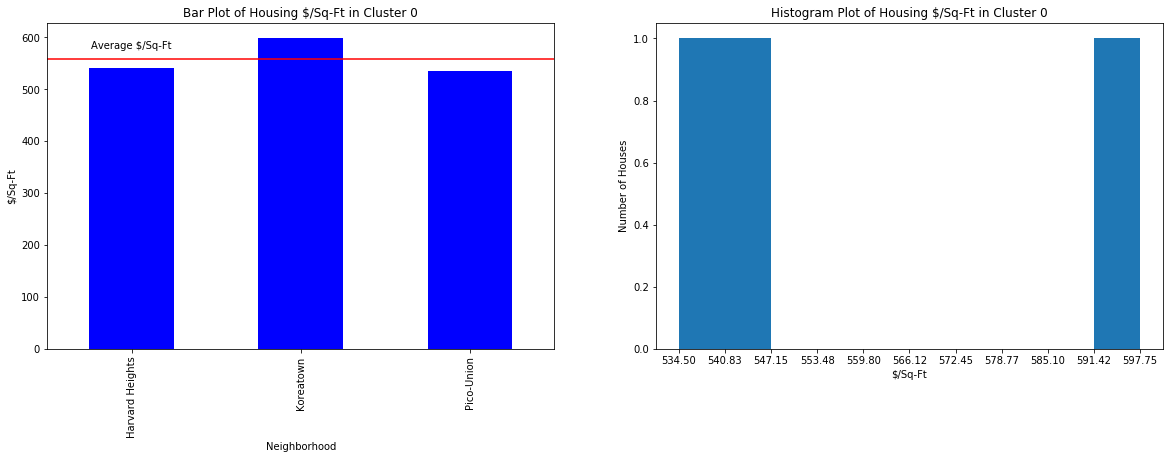

In [44]:
fig0= plt.figure() # create figure
ax0_1 = fig0.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax0_2 = fig0.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

# Subplot 1: bar plot
la_houses_c0.plot(kind='bar', color='blue', figsize=(20, 6), ax=ax0_1) # add to subplot 1
ax0_1.set_title('Bar Plot of Housing $/Sq-Ft in Cluster 0')
ax0_1.set_xlabel('Neighborhood')
ax0_1.set_ylabel('$/Sq-Ft')
ax0_1.axhline(y=la_houses_c0["$/SQUARE FEET"].mean(), color='r', linestyle='-')
ax0_1.text(0, la_houses_c0["$/SQUARE FEET"].mean()+20, 'Average $/Sq-Ft', horizontalalignment='center')
ax0_1.get_legend().remove()

# Subplot 2: histograp plot
count, bin_edge0 = np.histogram (la_houses_c0["$/SQUARE FEET"])
la_houses_c0.plot(kind='hist', xticks=bin_edge0, figsize=(20, 6), ax=ax0_2) # add to subplot 2
ax0_2.set_title('Histogram Plot of Housing $/Sq-Ft in Cluster 0')
ax0_2.set_xlabel('$/Sq-Ft')
ax0_2.set_ylabel('Number of Houses')
ax0_2.get_legend().remove()

fig0.show()

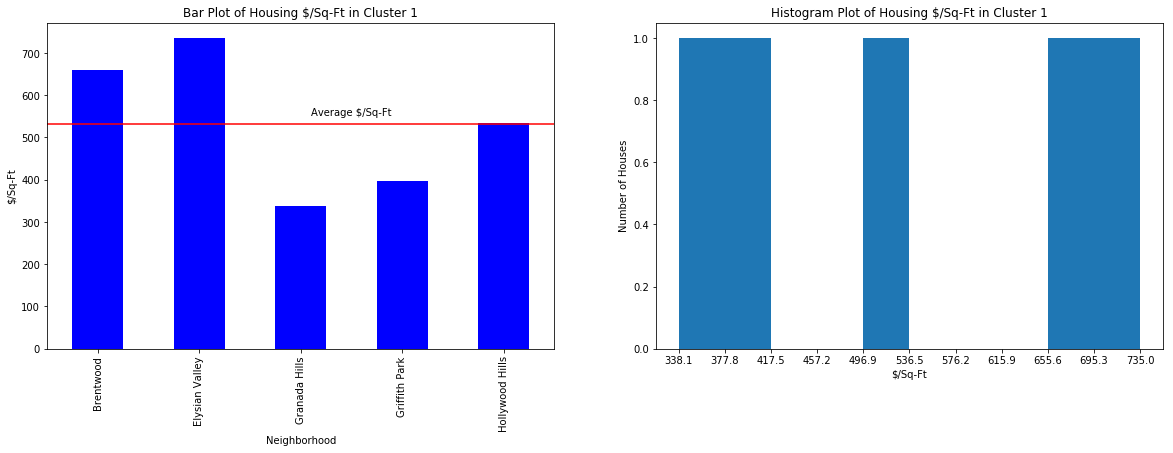

In [47]:
fig1= plt.figure() # create figure
ax1_1 = fig1.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1_2 = fig1.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

# Subplot 1: bar plot
la_houses_c1.plot(kind='bar', color='blue', figsize=(20, 6), ax=ax1_1) # add to subplot 1
ax1_1.set_title('Bar Plot of Housing $/Sq-Ft in Cluster 1')
ax1_1.set_xlabel('Neighborhood')
ax1_1.set_ylabel('$/Sq-Ft')
ax1_1.axhline(y=la_houses_c1["$/SQUARE FEET"].mean(), color='r', linestyle='-')
ax1_1.text(2.5, la_houses_c1["$/SQUARE FEET"].mean()+20, 'Average $/Sq-Ft', horizontalalignment='center')
ax1_1.get_legend().remove()

# Subplot 2: histograp plot
count, bin_edge1 = np.histogram (la_houses_c1["$/SQUARE FEET"])
la_houses_c1.plot(kind='hist', xticks=bin_edge1, figsize=(20, 6), ax=ax1_2) # add to subplot 2
ax1_2.set_title('Histogram Plot of Housing $/Sq-Ft in Cluster 1')
ax1_2.set_xlabel('$/Sq-Ft')
ax1_2.set_ylabel('Number of Houses')
ax1_2.get_legend().remove()

fig1.show()

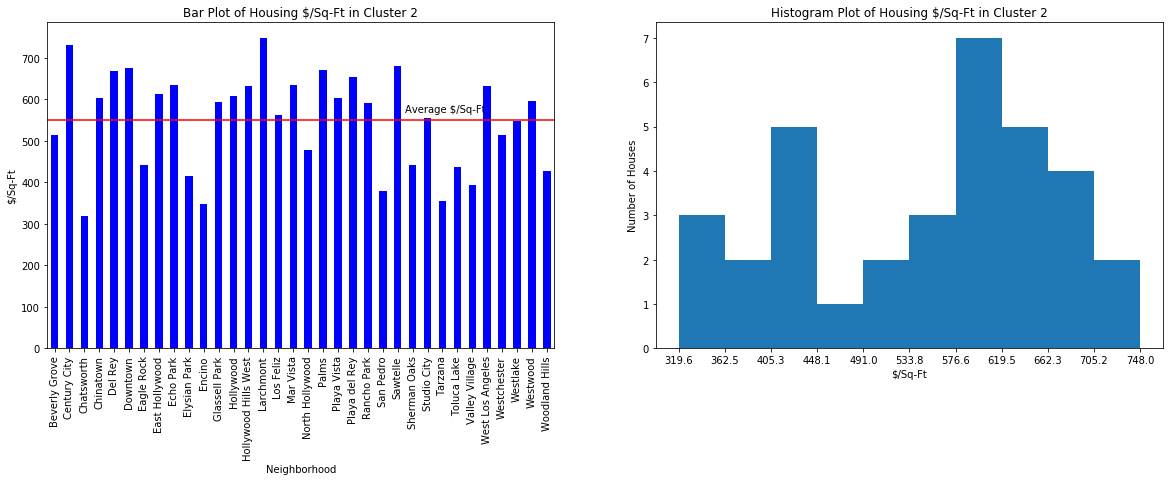

In [50]:
fig2= plt.figure() # create figure
ax2_1 = fig2.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax2_2 = fig2.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

# Subplot 1: bar plot
la_houses_c2.plot(kind='bar', color='blue', figsize=(20, 6), ax=ax2_1) # add to subplot 1
ax2_1.set_title('Bar Plot of Housing $/Sq-Ft in Cluster 2')
ax2_1.set_xlabel('Neighborhood')
ax2_1.set_ylabel('$/Sq-Ft')
ax2_1.axhline(y=la_houses_c2["$/SQUARE FEET"].mean(), color='r', linestyle='-')
ax2_1.text(23.5, la_houses_c2["$/SQUARE FEET"].mean()+20, 'Average $/Sq-Ft')
ax2_1.get_legend().remove()

# Subplot 2: histograp plot
count, bin_edge2 = np.histogram (la_houses_c2["$/SQUARE FEET"])
la_houses_c2.plot(kind='hist', xticks=bin_edge2, figsize=(20, 6), ax=ax2_2) # add to subplot 2
ax2_2.set_title('Histogram Plot of Housing $/Sq-Ft in Cluster 2')
ax2_2.set_xlabel('$/Sq-Ft')
ax2_2.set_ylabel('Number of Houses')
ax2_2.get_legend().remove()

fig2.show()

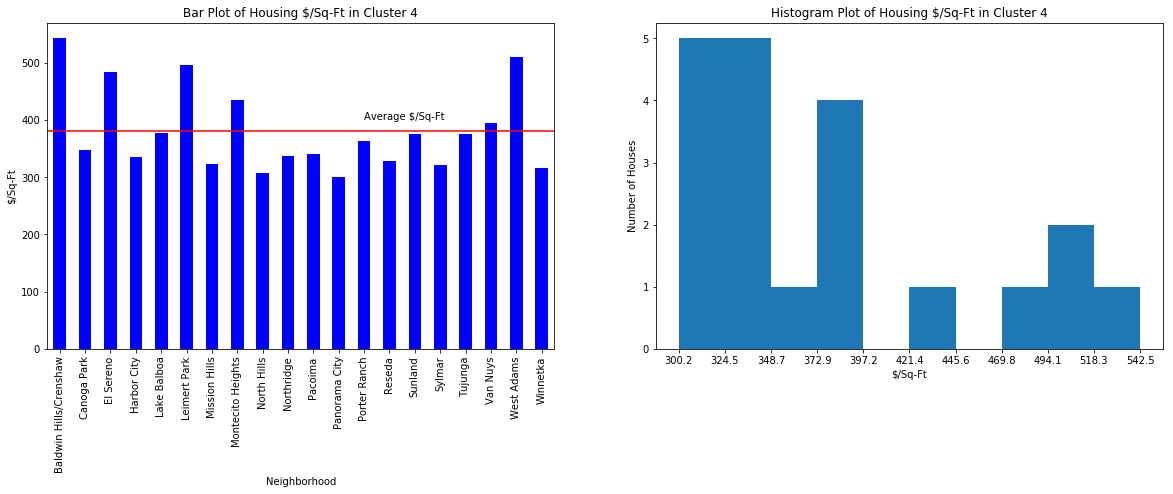

In [54]:
fig4= plt.figure() # create figure
ax4_1 = fig4.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax4_2 = fig4.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

# Subplot 1: bar plot
la_houses_c4.plot(kind='bar', color='blue', figsize=(20, 6), ax=ax4_1) # add to subplot 1
ax4_1.set_title('Bar Plot of Housing $/Sq-Ft in Cluster 4')
ax4_1.set_xlabel('Neighborhood')
ax4_1.set_ylabel('$/Sq-Ft')
ax4_1.axhline(y=la_houses_c4["$/SQUARE FEET"].mean(), color='r', linestyle='-')
ax4_1.text(12, la_houses_c4["$/SQUARE FEET"].mean()+20, 'Average $/Sq-Ft')
ax4_1.get_legend().remove()

# Subplot 2: histograp plot
count, bin_edge4 = np.histogram (la_houses_c4["$/SQUARE FEET"])
la_houses_c4.plot(kind='hist', xticks=bin_edge4, figsize=(20, 6), ax=ax4_2) # add to subplot 2
ax4_2.set_title('Histogram Plot of Housing $/Sq-Ft in Cluster 4')
ax4_2.set_xlabel('$/Sq-Ft')
ax4_2.set_ylabel('Number of Houses')
ax4_2.get_legend().remove()

fig4.show()

<bound method Figure.show of <Figure size 1440x1080 with 4 Axes>>

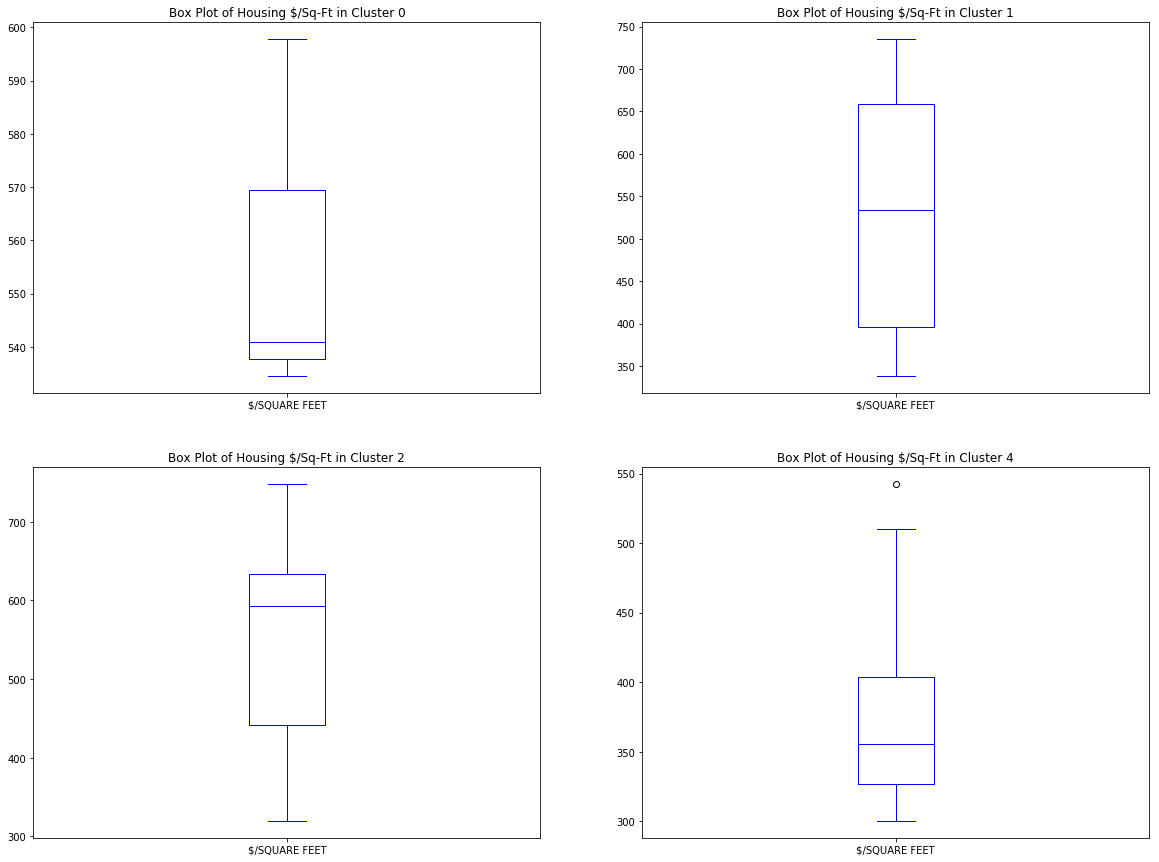

In [65]:
fig= plt.figure() # create figure
fig_1 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
fig_2 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)
fig_3 = fig.add_subplot(2, 2, 3) # add subplot 3 (2 row, 2 columns, third plot)
fig_4 = fig.add_subplot(2, 2, 4) # add subplot 4 (2 row, 2 columns, fourth plot)

la_houses_c0.plot(kind='box', color='blue', figsize=(20, 15), ax=fig_1) # add to subplot 1
fig_1.set_title('Box Plot of Housing $/Sq-Ft in Cluster 0')

la_houses_c1.plot(kind='box', color='blue', figsize=(20, 15), ax=fig_2) # add to subplot 2
fig_2.set_title('Box Plot of Housing $/Sq-Ft in Cluster 1')

la_houses_c2.plot(kind='box', color='blue', figsize=(20, 15), ax=fig_3) # add to subplot 3
fig_3.set_title('Box Plot of Housing $/Sq-Ft in Cluster 2')

la_houses_c4.plot(kind='box', color='blue', figsize=(20, 15), ax=fig_4) # add to subplot 4
fig_4.set_title('Box Plot of Housing $/Sq-Ft in Cluster 4')

fig.show